In [15]:
from MeronAlgorithmImprovedEstimators import MeronAlgorithmImprovedEstimators
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

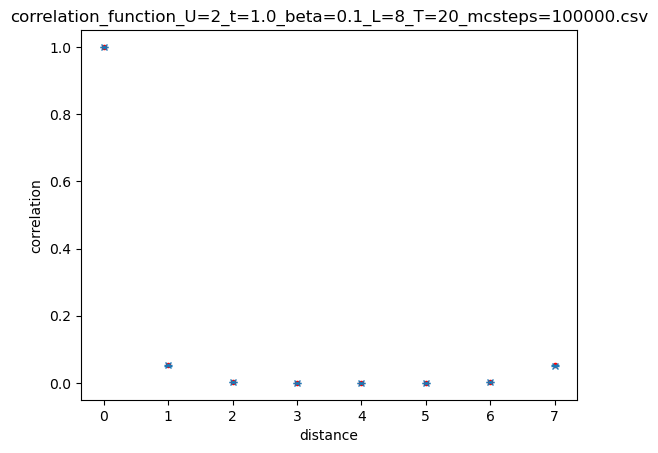

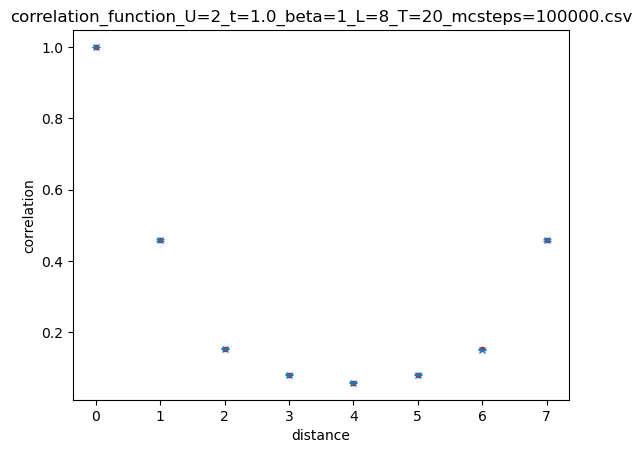

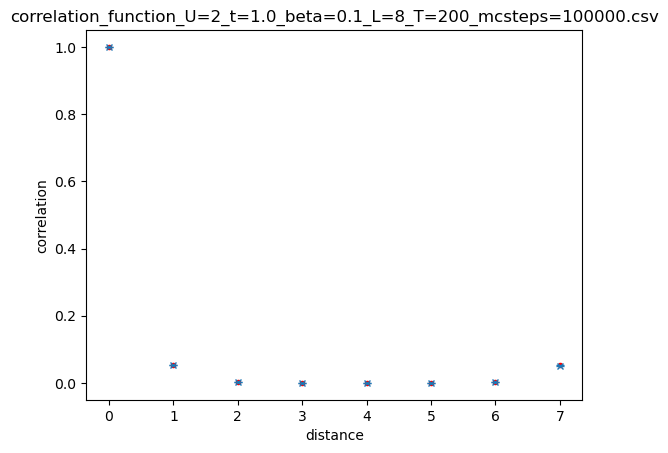

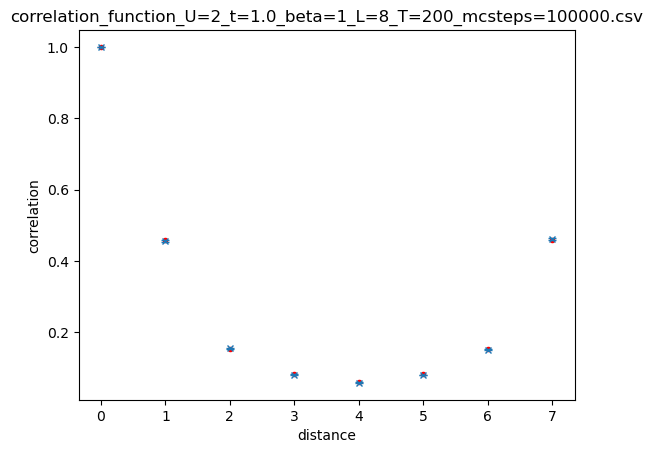

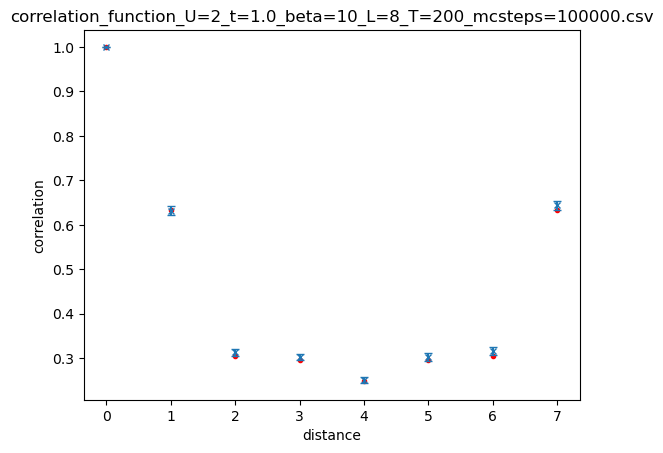

In [16]:
mc_steps = 100000  # number of mc steps
n = 8  # number of lattice points
U = 2

t = U / 2

average = {}
error = {}
exact = {}
N_values = [20, 200]
beta_values = [0.1, 1, 10, 100]

for N in N_values:
    for beta in beta_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue

        w_a = np.exp(- eps * U / 4)
        w_b = np.exp(eps * U / 4) * np.sinh(eps * t)

        data = pd.read_csv(f'correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}.csv')
        exact_data = pd.read_csv('exact_diagonalisation_results.csv', sep='\t')
        plt.plot(range(n), exact_data.loc[:, f'beta={"{:.1f}".format(beta)}'], 'r.')
        plt.errorbar(data.loc[:, 'site'], data.loc[:, 'average'], yerr=data.loc[:, 'error'], fmt='x', capsize=3,
                     markersize=5,
                     markerfacecolor='none')
        plt.title(f'correlation_function_U={U}_t={t}_beta={beta}_L={n}_T={N}_mcsteps={mc_steps}.csv')
        plt.xlabel('distance')
        plt.ylabel('correlation')
        plt.show()

        if beta not in average:
            average[beta] = {}
            exact[beta] = {}
            error[beta] = {}

        average[beta][N] = np.array(data.loc[:, 'average'])
        exact[beta][N] = np.array(exact_data.loc[:, f'beta={"{:.1f}".format(beta)}'])
        error[beta][N] = np.array(data.loc[:, 'error'])




In [19]:
difference = {}
for N in N_values:
    for beta in beta_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue
        if beta not in difference:
            difference[beta] = {}
        difference[beta][N] = np.abs(average[beta][N] - exact[beta][N])
        with np.errstate(divide='ignore'):
            significance = difference[beta][N] / error[beta][N]
        if np.max(significance[np.logical_and(np.logical_not(np.isinf(significance)),
                                              np.logical_not(np.isnan(significance)))]) >= 4:
            print('large error encountered')
            print(significance)

/var/folders/s8/rwbyl_wd7c13v2ndk0lsrf2c0000gn/T/ipykernel_22216/2507020049.py:11: RuntimeWarning: invalid value encountered in divide
  significance = difference[beta][N] / error[beta][N]


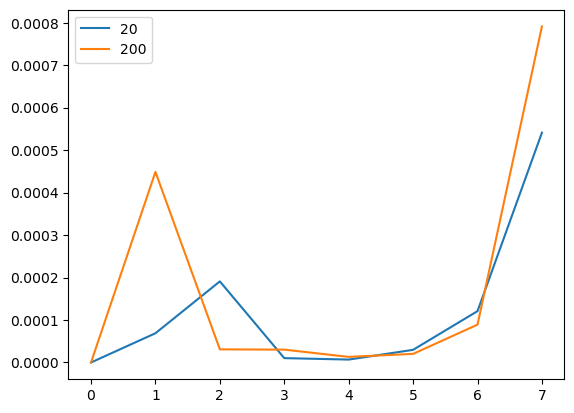

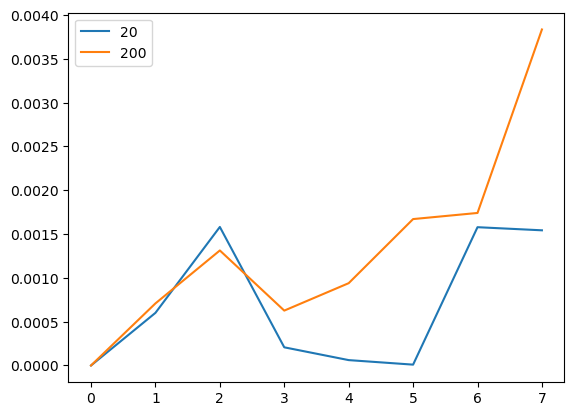

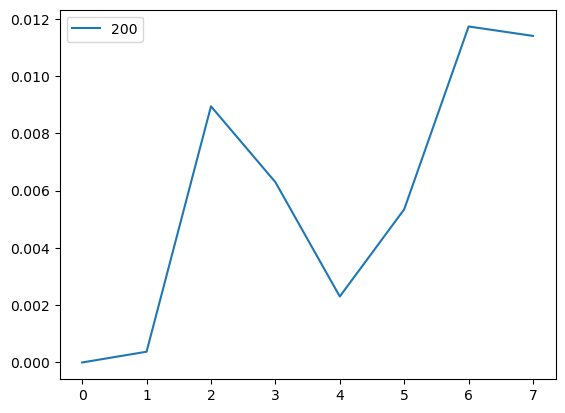

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


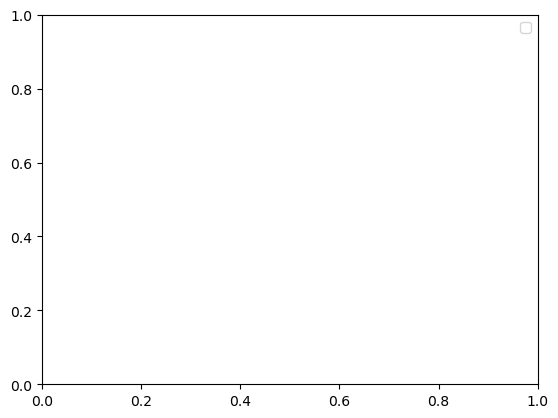

In [23]:
for beta in beta_values:
    for N in N_values:
        eps = 2 * beta / N
        if eps > 0.15:
            continue
        plt.plot(difference[beta][N], label=f'{N}')
    plt.legend()
    plt.show()